In [ ]:
My Process
Explanation of the data, where it came from, what the columns mean
https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5 

    1. import_dataset, store in a dataframe (hbd)
2. check the data to make sure it looks right (119390 rows, 32 cols)
    -.head(), .info(), .describe(), .shape
    -.isnull().sum() a count of the number of missing values in each column
3. further explore data
    -.value_counts()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
hbd = pd.read_csv("/Users/patriciaquigley/Downloads/hotel_bookings.csv")

In [4]:
hbd.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [9]:
#Initial shape is (119390, 32)
hbd.shape

(119390, 32)

In [10]:
#hbd.describe()
hbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
#Initial - children 4, country 488, agent 16340, company 112593
hbd.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# Percentage of missing values
missing_percentage = (hbd.isnull().sum() / len(hbd)) * 100
print(missing_percentage)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [22]:
# Drop company and agent
to_drop = ['company', 'agent']
hbd.drop(to_drop, inplace=True, axis=1)

In [21]:
hbd.shape

(119390, 30)

In [8]:
hbd.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [29]:
hbd.duplicated().sum()

32039

In [33]:
hbd.drop_duplicates(inplace=True)

In [34]:
hbd.shape

(87351, 30)

In [35]:
hbd['country'].mode()

0    PRT
Name: country, dtype: object

In [36]:
hbd['country'].fillna(str(hbd['country'].mode().values[0]),inplace=True)

In [15]:
hbd.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [37]:
hbd['children'].mode()

0    0.0
Name: children, dtype: object

In [17]:
hbd['children'].fillna(str(hbd['children'].mode().values[0]),inplace=True)

In [38]:
hbd.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [39]:
hbd.shape

(87351, 30)

In [40]:
hbd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87351 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87351 non-null  object 
 1   is_canceled                     87351 non-null  int64  
 2   lead_time                       87351 non-null  int64  
 3   arrival_date_year               87351 non-null  int64  
 4   arrival_date_month              87351 non-null  object 
 5   arrival_date_week_number        87351 non-null  int64  
 6   arrival_date_day_of_month       87351 non-null  int64  
 7   stays_in_weekend_nights         87351 non-null  int64  
 8   stays_in_week_nights            87351 non-null  int64  
 9   adults                          87351 non-null  int64  
 10  children                        87351 non-null  object 
 11  babies                          87351 non-null  int64  
 12  meal                            8735

In [116]:
# Change object types to numerical or categorical
hbd["hotel"] = hbd["hotel"].astype('category')
hbd["meal"] = hbd["meal"].astype('category')
hbd["country"] = hbd["country"].astype('category')
hbd["market_segment"] = hbd["market_segment"].astype('category')
hbd["distribution_channel"] = hbd["distribution_channel"].astype('category')
hbd["reserved_room_type"] = hbd["reserved_room_type"].astype('category')
hbd["assigned_room_type"] = hbd["assigned_room_type"].astype('category')
hbd["deposit_type"] = hbd["deposit_type"].astype('category')
hbd["customer_type"] = hbd["customer_type"].astype('category')
hbd["children"] = hbd["children"].astype('float')
hbd["arrival_date_month"] = hbd["arrival_date_month"].astype('category')
hbd["reservation_status"] = hbd["reservation_status"].astype('category')

In [117]:
hbd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87348 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87348 non-null  category      
 1   is_canceled                     87348 non-null  int64         
 2   lead_time                       87348 non-null  int64         
 3   arrival_date_year               87348 non-null  int64         
 4   arrival_date_month              87348 non-null  category      
 5   arrival_date_week_number        87348 non-null  int64         
 6   arrival_date_day_of_month       87348 non-null  int64         
 7   stays_in_weekend_nights         87348 non-null  int64         
 8   stays_in_week_nights            87348 non-null  int64         
 9   adults                          87348 non-null  int64         
 10  children                        87348 non-null  float64       
 11  babies

In [118]:
#df["meal"].replace("Undefined", "SC", inplace=True)
hbd["children"].value_counts()

children
0.0    78985
1.0     4695
2.0     3593
3.0       75
Name: count, dtype: int64

In [58]:
# Find outliers
hbd.sort_values('children', ascending=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,2015-07-12
116150,City Hotel,0,51,2017,July,28,11,0,4,2,3.0,0,BB,MEX,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,321.50,0,1,Check-Out,2017-07-15
117533,City Hotel,0,156,2017,August,31,2,0,3,2,3.0,0,BB,GBR,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,260.00,0,1,Check-Out,2017-08-05
51195,City Hotel,1,66,2016,May,21,15,2,3,1,3.0,0,BB,AGO,Direct,Direct,0,0,0,F,F,0,No Deposit,0,Transient,193.50,0,0,Canceled,2016-03-28
94774,City Hotel,0,103,2016,August,32,2,2,5,2,3.0,0,BB,IRL,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,198.98,0,1,Check-Out,2016-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36462,Resort Hotel,0,292,2017,May,20,15,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Contract,72.95,0,0,Check-Out,2017-05-22
36461,Resort Hotel,0,193,2017,May,20,15,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,0,Contract,68.95,0,0,Check-Out,2017-05-22
36460,Resort Hotel,0,0,2017,May,20,15,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,70.95,0,0,Check-Out,2017-05-22
36459,Resort Hotel,0,93,2017,May,20,18,1,3,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,49.50,0,0,Check-Out,2017-05-22


In [60]:
# Drop the outliers
hbd.drop(328, axis=0, inplace=True)

In [62]:
hbd['babies'].value_counts()

babies
0     86438
1       895
2        15
10        1
9         1
Name: count, dtype: int64

In [65]:
hbd.sort_values('babies', ascending=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14
7896,Resort Hotel,1,345,2016,September,36,1,2,7,2,0.0,2,BB,PRT,Online TA,TA/TO,0,0,0,G,G,2,No Deposit,0,Transient,145.00,0,1,Canceled,2016-02-23
97901,City Hotel,0,11,2016,September,39,20,0,2,2,0.0,2,BB,PRT,Online TA,TA/TO,0,0,0,F,F,1,No Deposit,0,Transient,248.00,0,2,Check-Out,2016-09-22
84429,City Hotel,0,1,2016,February,9,25,0,1,2,1.0,2,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,227.00,0,3,Check-Out,2016-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35162,Resort Hotel,0,351,2017,April,14,8,2,5,1,0.0,0,HB,DEU,Groups,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,68.00,0,0,Check-Out,2017-04-15
35161,Resort Hotel,0,351,2017,April,14,8,2,5,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,68.00,0,0,Check-Out,2017-04-15
35160,Resort Hotel,0,351,2017,April,14,8,2,5,2,0.0,0,HB,DEU,Groups,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,82.00,0,0,Check-Out,2017-04-15
35158,Resort Hotel,0,59,2017,April,15,10,1,4,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,79.00,0,1,Check-Out,2017-04-15


In [66]:
hbd.drop(46619, axis=0, inplace=True)
hbd.drop(78656, axis=0, inplace=True)

In [67]:
hbd.shape

(87348, 30)

In [68]:
hbd['meal'].value_counts()

meal
BB           67937
SC            9480
HB            9082
Undefined      490
FB             359
Name: count, dtype: int64

In [69]:
# Continue to tidy data into clear columns
hbd["meal"].replace("Undefined", "SC", inplace=True)

In [70]:
# Add Undefined to SC and have one column - tidy
# BB just breakfast, SC no meal plan, HB breakfast +1 other meal, FB is 3 meals
hbd['meal'].value_counts()

meal
BB    67937
SC     9970
HB     9082
FB      359
Name: count, dtype: int64

In [83]:
# A value we want to use in analysis
hbd['market_segment'].value_counts()

market_segment
Online TA        51606
Offline TA/TO    13877
Direct           11796
Groups            4939
Corporate         4199
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64

In [84]:
# A value we want to use in analysis
hbd['is_canceled'].value_counts()

is_canceled
0    63329
1    24019
Name: count, dtype: int64

In [81]:
# A value we want to use in analysis
hbd['is_repeated_guest'].value_counts()

is_repeated_guest
0    83933
1     3415
Name: count, dtype: int64

In [85]:
# A value we want to use in analysis
hbd['previous_cancellations'].value_counts()

previous_cancellations
0     85663
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: count, dtype: int64

In [86]:
# A value we want to use in analysis
hbd['previous_bookings_not_canceled'].value_counts()

previous_bookings_not_canceled
0     83803
1      1482
2       580
3       331
4       228
      ...  
47        1
49        1
50        1
51        1
72        1
Name: count, Length: 73, dtype: int64

In [89]:
# A value we want to use in analysis
# Rooms E thru P ideal for social media blitz
hbd['reserved_room_type'].value_counts().sort_values(ascending=False)

reserved_room_type
A    56512
D    17395
E     6045
F     2822
G     2052
B      999
C      915
H      596
L        6
P        6
Name: count, dtype: int64

In [90]:
# A value we want to use in analysis
# What's going on with this discrepancy. I'd cancel if I got a crappier room than I expected
# Do guests get extra perks for impromtu downgrade
hbd['assigned_room_type'].value_counts()

assigned_room_type
A    46285
D    22419
E     7191
F     3625
G     2498
C     2165
B     1819
H      706
I      357
K      276
P        6
L        1
Name: count, dtype: int64

In [91]:
# A value we want to use in analysis
# Changes such as persons, arrival date, nights, reserved room type or meal, up to check-in or cancellation
hbd['booking_changes'].value_counts()

booking_changes
0     71452
1     10897
2      3507
3       875
4       356
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: count, dtype: int64

In [92]:
# A value we want to use in analysis
# The no deposit must change immediately
hbd['deposit_type'].value_counts()

deposit_type
No Deposit    86203
Non Refund     1038
Refundable      107
Name: count, dtype: int64

In [99]:
# A value we want to use in analysis
# Number of days the booking was in the waiting list before it was confirmed to the customer - This is unacceptable
# Anything more than 24 hrs requires an explanation
# Would a real-time PMS system help here
hbd['days_in_waiting_list'].value_counts().head(10)

days_in_waiting_list
0      86488
63        53
87        25
44        23
15        22
58        21
48        21
122       21
38        19
77        17
Name: count, dtype: int64

In [100]:
# A value we may want to use in analysis
hbd['customer_type'].value_counts()

customer_type
Transient          71952
Transient-Party    11714
Contract            3138
Group                544
Name: count, dtype: int64

In [101]:
# A value we want to use in analysis
# Is our pricing competitive
# There are way too many 0.00 adr - huh?
hbd['adr'].value_counts()

adr
0.00      1778
75.00     1320
65.00     1259
48.00      876
85.00      858
          ... 
55.11        1
33.65        1
31.41        1
31.80        1
157.71       1
Name: count, Length: 8878, dtype: int64

In [103]:
# A value we MAY want to use in analysis
# Drop 3 and 8 car space requests - NOT TIDY
hbd['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    80035
1     7280
2       28
3        3
8        2
Name: count, dtype: int64

In [104]:
# A value we MAY want to use in analysis
hbd['total_of_special_requests'].value_counts()

total_of_special_requests
0    43863
1    29004
2    11809
3     2316
4      320
5       36
Name: count, dtype: int64

In [107]:
# A value we MAY want to use in analysis
# The No-Show gets hit with penalty fees for sure
hbd['reservation_status'].value_counts()

reservation_status
Check-Out    63329
Canceled     23006
No-Show       1013
Name: count, dtype: int64

In [110]:
# Add an arrival date column, status date-arrival date = lead time
# Make arrival_date a date type
hbd['arrival_date'] = hbd['arrival_date_year'].astype(str) + '-' + hbd['arrival_date_month'].astype(str) + '-' + hbd['arrival_date_day_of_month'].astype(str)
hbd['arrival_date'].head()
#hbd.shape
#hbd.info()

0    2015-July-1
1    2015-July-1
2    2015-July-1
3    2015-July-1
4    2015-July-1
Name: arrival_date, dtype: object

In [113]:
#df = pd.DataFrame(['arrival_date'])
# convert to datetime using pd.to_datetime
hbd['arrival_date'] = pd.to_datetime(hbd['arrival_date'])
hbd['reservation_status_date'] = pd.to_datetime(hbd['reservation_status_date'])
hbd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87348 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87348 non-null  category      
 1   is_canceled                     87348 non-null  int64         
 2   lead_time                       87348 non-null  int64         
 3   arrival_date_year               87348 non-null  int64         
 4   arrival_date_month              87348 non-null  object        
 5   arrival_date_week_number        87348 non-null  int64         
 6   arrival_date_day_of_month       87348 non-null  int64         
 7   stays_in_weekend_nights         87348 non-null  int64         
 8   stays_in_week_nights            87348 non-null  int64         
 9   adults                          87348 non-null  int64         
 10  children                        87348 non-null  float64       
 11  babies

In [140]:
# check if the dataset is logical - It is
hbd('is_canceled').equals(hbd['is_canceled'])

True

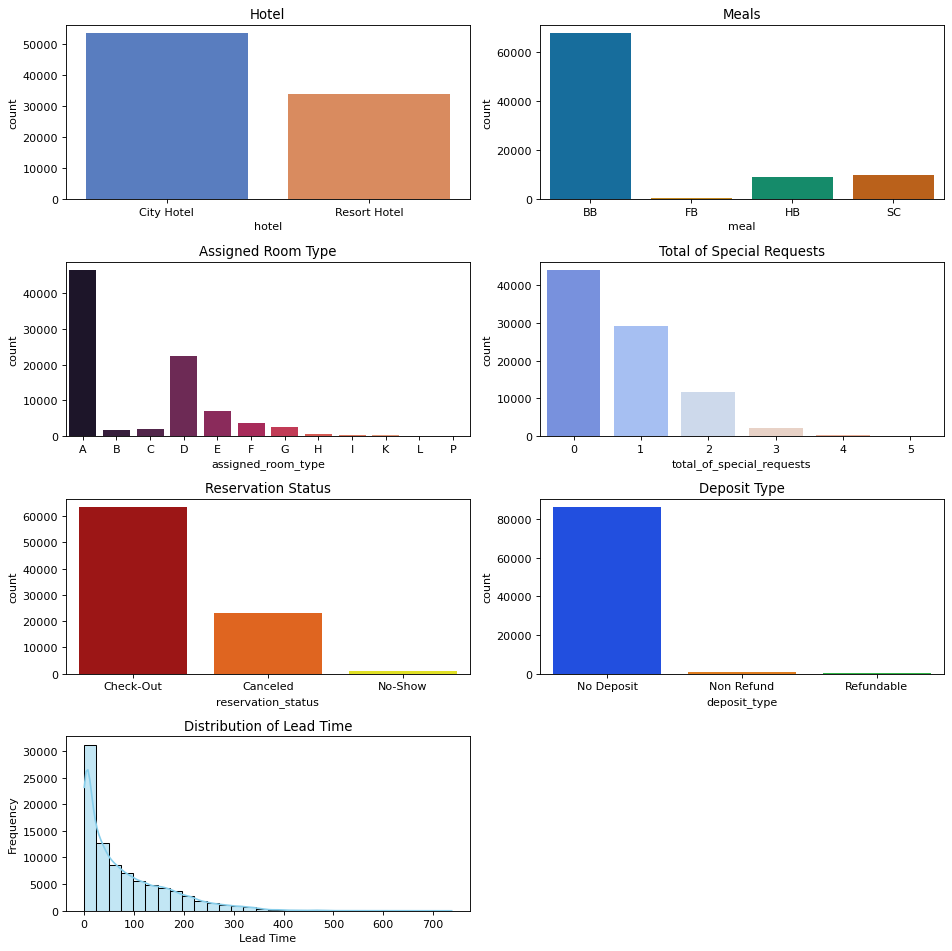

In [71]:
# Run this against is_canceled=1
plt.figure(figsize=(12, 12), dpi=80)

plt.subplot(4, 2, 1)
plt.title('Hotel')
sns.countplot(x='hotel', data=hbd, palette='muted')

plt.subplot(4, 2, 2)
plt.title('Meals')
sns.countplot(x='meal', data=hbd, palette='colorblind')

plt.subplot(4, 2, 3)
plt.title('Assigned Room Type')
sns.countplot(x='assigned_room_type', data=hbd, palette='rocket')

plt.subplot(4, 2, 4)
plt.title('Total of Special Requests')
sns.countplot(x='total_of_special_requests', data=hbd, palette='coolwarm')

plt.subplot(4, 2, 5)
plt.title('Reservation Status')
sns.countplot(x='reservation_status', data=hbd, palette='hot')

plt.subplot(4, 2, 6)
plt.title('Deposit Type')
sns.countplot(x='deposit_type', data=hbd, palette='bright')

plt.subplot(4, 2, 7)
plt.title('Distribution of Lead Time')
sns.histplot(hbd['lead_time'], bins=30, color='skyblue', edgecolor='black', kde=True)
plt.xlabel('Lead Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [119]:
lst1 = ['is_canceled', 'hotel']

In [125]:
type(lst1)

list

In [122]:
type_of_hotel_canceled = hbd[lst1]

In [126]:
#type(type_of_hotel_canceled)
type_of_hotel_canceled

,is_canceled,hotel
0,0,Resort Hotel
1,0,Resort Hotel
2,0,Resort Hotel
3,0,Resort Hotel
4,0,Resort Hotel
...,...,...
119385,0,City Hotel
119386,0,City Hotel
119387,0,City Hotel
119388,0,City Hotel


In [134]:
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 1].groupby(['hotel']).size().reset_index(name = 'count')

In [128]:
canceled_hotel

,hotel,count
0,City Hotel,16047
1,Resort Hotel,7972


In [135]:
not_canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 0].groupby(['hotel']).size().reset_index(name = 'count')

In [136]:
not_canceled_hotel

,hotel,count
0,City Hotel,37365
1,Resort Hotel,25964


Text(0.5, 1.0, 'Graph showing cancellation rates in city and resort hotel')

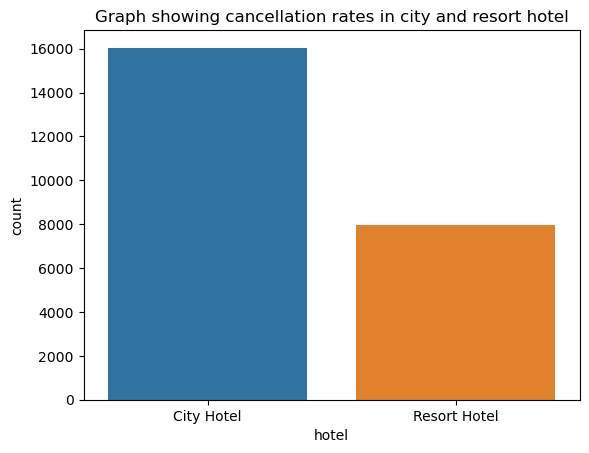

In [144]:
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').
set_title('Graph showing cancellation rates in city and resort hotel')

# I want to compare canceled_hotel to not_canceled_hotel

Text(0, 0.5, 'Count')

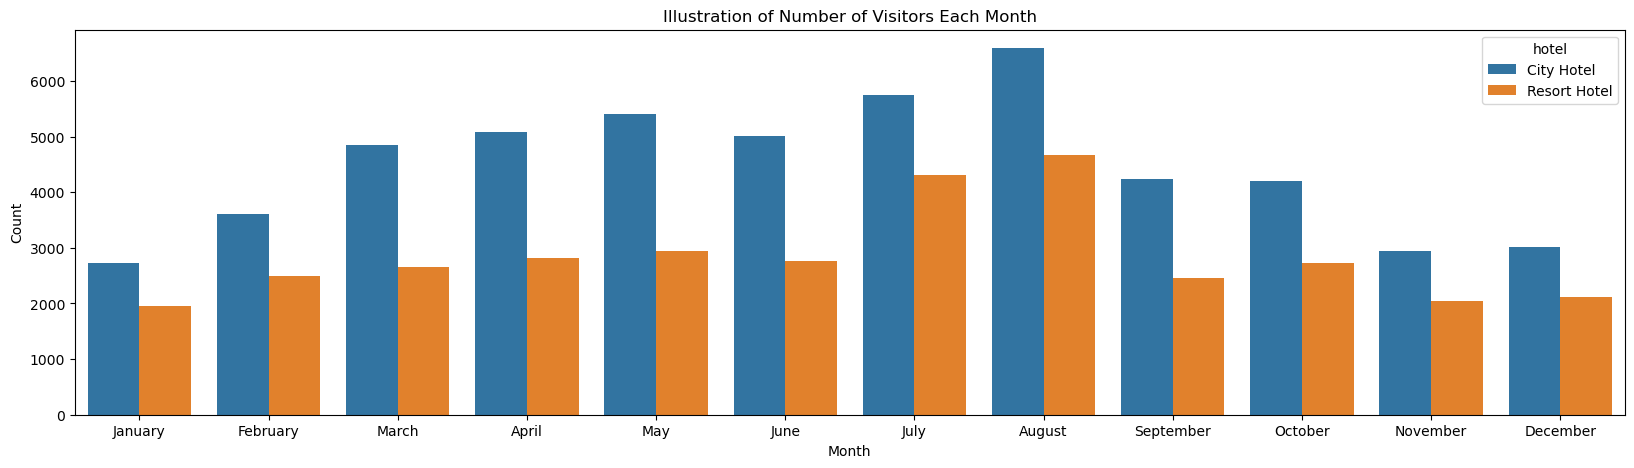

In [142]:
# We can simply use a countplot as we are visualising categorical data
plt.figure(figsize=(20,5))

# data we will use in a list
list1 = ['hotel','arrival_date_month']

# plotting
sns.countplot(data = hbd[list1],x= "arrival_date_month",hue="hotel",
              order=["January","February","March","April","May","June","July","August","September","October","November","December"]).set_title(
'Illustration of Number of Visitors Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

# 1.  How can i do a spread of the data - Inferential Stats
# 2.  Change Color

In [146]:
hbd[['arrival_date', 'adults']].head()

,arrival_date,adults
0,2015-07-01,2
1,2015-07-01,2
2,2015-07-01,1
3,2015-07-01,1
4,2015-07-01,2


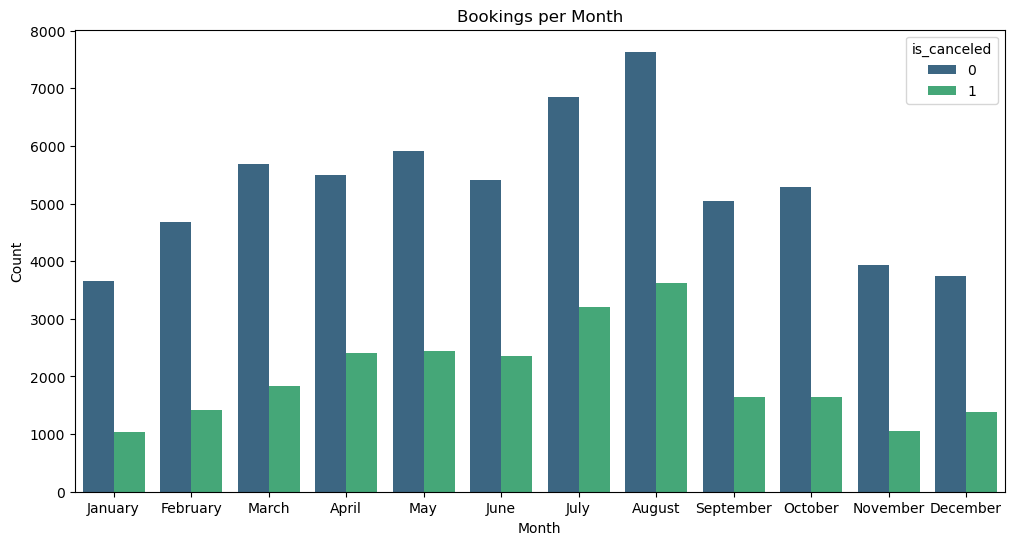

In [147]:
# CHANGE THIS TO MY ANALYSIS

#explore monthly treands

# Convert 'arrival_date_month' to a categorical data type for proper ordering
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hbd['arrival_date_month'] = pd.Categorical(hbd['arrival_date_month'], categories=months_order, ordered=True)

# Create a bar plot of bookings per month
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=hbd, hue='is_canceled', palette='viridis')
plt.title('Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

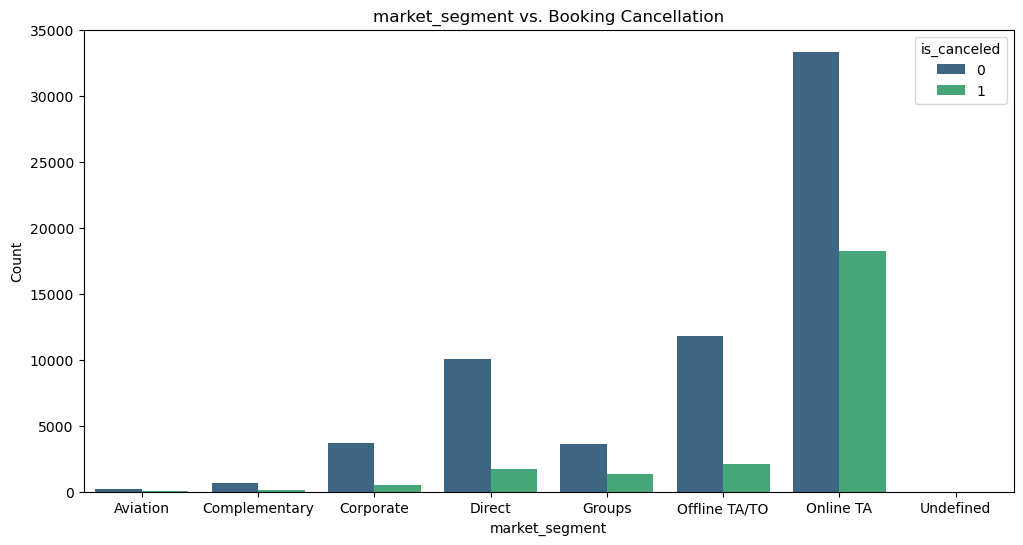

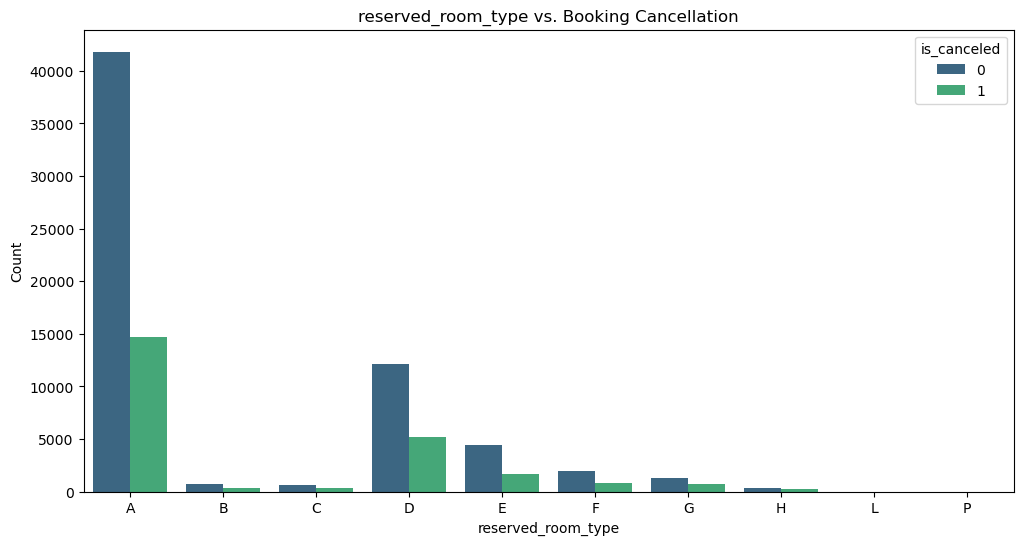

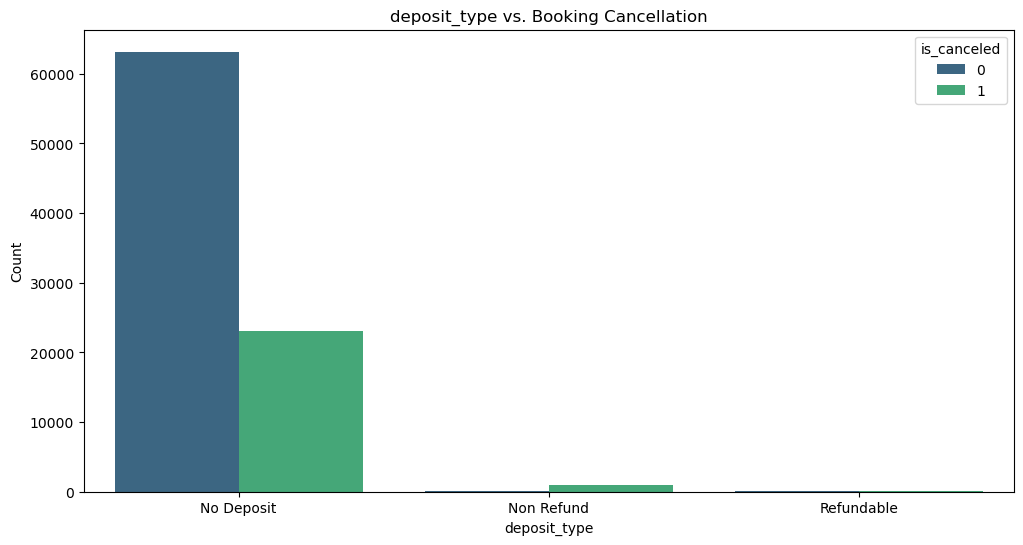

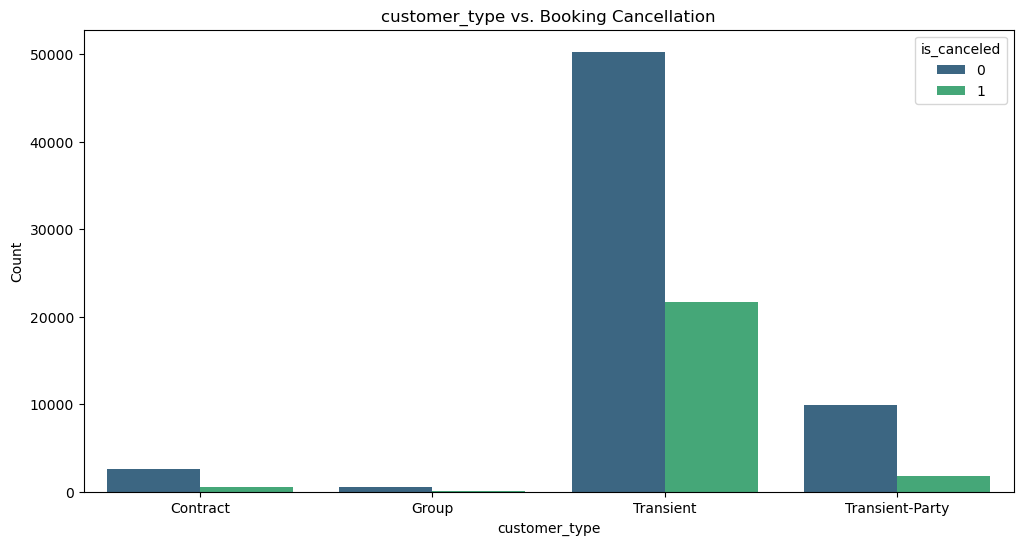

In [149]:
# CHANGE THIS TO MY ANALYSIS

# Create box plots for categorical features
categorical_features = ['market_segment', 'reserved_room_type', 'deposit_type', 'customer_type']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=hbd, hue='is_canceled', palette='viridis')
    plt.title(f'{feature} vs. Booking Cancellation')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()